## The output was correct in Positron, this is duplicated

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### Scrape the Location Counts

In [2]:
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
len(soup.find_all("table", attrs={"class": "wpr-table"}))

1

Finding individual state:
table = soup.find("table", class_="wpr-table")
row = table.find("tbody").find_all("tr")
first_state = row[0].find("th")
state = first_state.find("a")
state_name = state.text.strip()
state_name

Finding individual cell:
table = soup.find("table", class_="wpr-table")
row = table.find("tbody").find_all("tr")
cells = row[0].find("td")
cell_name = cells.text.strip()
cell_name

In [4]:
table = soup.find("table", class_="wpr-table")

# initialize an empty list
rows = []

# Iterate over all rows in the matched table
for row in table.find("tbody").find_all("tr"):
    # Get the state cell which is under an <a> tag
    state = row.find("th").find("a").text.strip()

    cells = row.find_all("td")

    # The information we need is the text between tags.

    if len(cells) >= 3:  # Ensure there are enough columns
     starbucks2021 = cells[1].text.strip()
     starbucks2023 = cells[0].text.strip()
     starbucks2024 = cells[2].text.strip()

     rows.append({
       "State": state,
       "Starbucks stores 2021": starbucks2021,
       "Starbucks stores 2023": starbucks2023,
       "Starbucks stores 2024": starbucks2024})

starbucks = pd.DataFrame(rows)
print(starbucks)

                   State  ... Starbucks stores 2024
0             California  ...                 3,117
1                  Texas  ...                 1,409
2                Florida  ...                   892
3             Washington  ...                   736
4               New York  ...                   715
5               Illinois  ...                   685
6                Arizona  ...                   579
7               Colorado  ...                   506
8                   Ohio  ...                   499
9               Virginia  ...                   510
10                Oregon  ...                      
11          Pennsylvania  ...                      
12        North Carolina  ...                      
13               Georgia  ...                      
14              Michigan  ...                      
15         Massachusetts  ...                      
16            New Jersey  ...                      
17              Maryland  ...                      
18          

In [5]:
response2 = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
soup2 = BeautifulSoup(response2.content, "html.parser")

In [6]:
len(soup2.find_all("table", attrs={"class": "wpr-table"}))

1

In [7]:
table2 = soup2.find("table", attrs={"class": "wpr-table"})

# Initialize an empty list to store the data
rows = []

# Iterate over all rows in the table, skipping the header row
for row in table2.find("tbody").find_all("tr"):
    # Get the state name directly from the <th> tag (no <a> tag)
    state = row.find("th").find("a").text.strip()

    # Get all <td> cells in the row
    cells = row.find_all("td")

    # Ensure there are enough cells (at least 2)
    if len(cells) >= 2:
        # Extract the data for 2023 and 2024
        dunkin2023 = cells[1].text.strip()
        dunkin2024 = cells[0].text.strip()

        # Append the row data as a dictionary
        rows.append({
            "State": state,
            "Dunkin stores 2023": dunkin2023,
            "Dunkin stores 2024": dunkin2024
        })

# Convert the data to a DataFrame
dunkin = pd.DataFrame(rows)

# Print the DataFrame
print(dunkin)


                   State Dunkin stores 2023 Dunkin stores 2024
0               New York              1,414              1,431
1          Massachusetts              1,068              1,042
2                Florida                883                909
3             New Jersey                866                872
4               Illinois                692                711
5           Pennsylvania                629                650
6            Connecticut                480                476
7               Maryland                303                311
8                Georgia                265                287
9                   Ohio                245                261
10              Virginia                230                244
11                 Texas                196                226
12        North Carolina                206                224
13         New Hampshire                218                216
14                 Maine                159            

#### Merge the two table

In [8]:
merged_1 = starbucks.merge(dunkin, on="State")
merged_1

,State,Starbucks stores 2021,Starbucks stores 2023,Starbucks stores 2024,Dunkin stores 2023,Dunkin stores 2024
0,California,"2,959","3,080","3,117",134,143
1,Texas,"1,215","1,346","1,409",196,226
2,Florida,786,844,892,883,909
3,Washington,739,741,736,19,0
4,New York,643,692,715,"1,414","1,431"
5,Illinois,621,677,685,692,711
6,Arizona,535,548,579,102,110
7,Colorado,497,495,506,43,48
8,Ohio,446,491,499,245,261
9,Virginia,456,489,510,230,244


#### Clean the data

In [9]:
# Melt Starbucks data (wide to long)
starbucks_long = pd.melt(
    merged_1,
    id_vars=["State"],
    value_vars=["Starbucks stores 2021", "Starbucks stores 2023", "Starbucks stores 2024"],
    var_name="Year_Brand",
    value_name="Store_Count"
)

# Extract year and brand from 'Year_Brand'
starbucks_long["Year"] = starbucks_long["Year_Brand"].str.extract(r'(\d{4})')
starbucks_long["Brand"] = "Starbucks"  # Set the brand explicitly

# Melt Dunkin' data (wide to long)
dunkin_long = pd.melt(
    merged_1,
    id_vars=["State"],
    value_vars=["Dunkin stores 2023", "Dunkin stores 2024"],
    var_name="Year_Brand",
    value_name="Store_Count"
)

# Extract year and brand from 'Year_Brand'
dunkin_long["Year"] = dunkin_long["Year_Brand"].str.extract(r'(\d{4})')
dunkin_long["Brand"] = "Dunkin"

# Concatenate both long-form datasets
long_format = pd.concat([starbucks_long, dunkin_long], ignore_index=True)

# Drop the 'Year_Brand' column since it's no longer needed
long_format = long_format.drop("Year_Brand", axis=1)

# Reorder columns for readability
long_format = long_format[["State", "Brand", "Year", "Store_Count"]]

# Display the result
print(long_format)

             State      Brand  Year Store_Count
0       California  Starbucks  2021       2,959
1            Texas  Starbucks  2021       1,215
2          Florida  Starbucks  2021         786
3       Washington  Starbucks  2021         739
4         New York  Starbucks  2021         643
..             ...        ...   ...         ...
250   South Dakota     Dunkin  2024           0
251  West Virginia     Dunkin  2024          31
252        Wyoming     Dunkin  2024           1
253   North Dakota     Dunkin  2024           0
254        Vermont     Dunkin  2024          50

[255 rows x 4 columns]
             State      Brand  Year Store_Count
0       California  Starbucks  2021       2,959
1            Texas  Starbucks  2021       1,215
2          Florida  Starbucks  2021         786
3       Washington  Starbucks  2021         739
4         New York  Starbucks  2021         643
..             ...        ...   ...         ...
250   South Dakota     Dunkin  2024           0
251  West Virgin

#### Scrape data from wikipedia

In [10]:
response3 = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup3 = BeautifulSoup(response3.content, "html.parser")

In [11]:
#len(soup3.find_all("table", attrs={"class": "wikitable"}))
table3 = soup3.find("table", attrs={"class": "wikitable"})

Finding individual state:
row = table3.find("tbody").find_all("tr")
first_state = row[1].find_all("td")
state = first_state[2].find("a")
state_name = state.text.strip()
state_name

Finding individual population:
row = table3.find("tbody").find_all("tr")
cells = row[1].find_all("td")
specific_cells = cells[3].text.strip()
specific_cells

In [12]:
rows = []  

for row in table3.find("tbody").find_all("tr")[1:57]:
    cells = row.find_all("td")  
    
    # Extract state name from the 3rd column
    state = cells[2].find("a").text.strip()  

    # Extract population from the 4th column
    population = cells[3].text.strip()

    # Append the data to the rows list as a dictionary
    rows.append({
        "State": state,
        "Population": population
    })

# Convert the list of dictionaries into a DataFrame
population = pd.DataFrame(rows)

# Print the DataFrame
print(population)


                       State  Population
0                 California  39,538,223
1                      Texas  30,145,505
2                    Florida  21,538,187
3                   New York  20,201,249
4               Pennsylvania  13,002,700
5                   Illinois  12,812,508
6                       Ohio  11,799,448
7                    Georgia  10,711,908
8             North Carolina  10,439,388
9                   Michigan  10,077,331
10                New Jersey   9,288,994
11                  Virginia   8,631,393
12                Washington   7,705,281
13                   Arizona   7,151,502
14             Massachusetts   7,029,917
15                 Tennessee   6,910,840
16                   Indiana   6,785,528
17                  Maryland   6,177,224
18                  Missouri   6,154,913
19                 Wisconsin   5,893,718
20                  Colorado   5,773,714
21                 Minnesota   5,706,494
22            South Carolina   5,118,425
23              

In [13]:
merged_2 = merged_1.merge(population, on="State")
merged_2

,State,Starbucks stores 2021,Starbucks stores 2023,Starbucks stores 2024,Dunkin stores 2023,Dunkin stores 2024,Population
0,California,"2,959","3,080","3,117",134,143,"39,538,223"
1,Texas,"1,215","1,346","1,409",196,226,"30,145,505"
2,Florida,786,844,892,883,909,"21,538,187"
3,Washington,739,741,736,19,0,"7,705,281"
4,New York,643,692,715,"1,414","1,431","20,201,249"
5,Illinois,621,677,685,692,711,"12,812,508"
6,Arizona,535,548,579,102,110,"7,151,502"
7,Colorado,497,495,506,43,48,"5,773,714"
8,Ohio,446,491,499,245,261,"11,799,448"
9,Virginia,456,489,510,230,244,"8,631,393"


long_format = pd.melt(
    merged_2, 
    id_vars=["State", "Population"],  # Columns to keep as identifiers
    var_name="Store_Type_Year",  # Name for the new 'variable' column
    value_name="Store_Count"  # Name for the new 'value' column
)
print(long_format)

In [14]:
long_format = pd.melt(
    merged_2,
    id_vars=["State", "Population"],  # Keep these columns
    var_name="Store_Type_Year",  # Combined store type and year
    value_name="Count"  # Values column
)

# Split 'Store_Type_Year' into 'Store_Type' and 'Year'
long_format[['Store_Type', 'Year']] = long_format['Store_Type_Year'].str.rsplit(' ', n=1, expand=True)

# Clean 'Store_Type' column by removing 'stores'
long_format['Store_Type'] = long_format['Store_Type'].str.replace(r'\b(stores)\b', '', case=False, regex=True).str.strip()

# Drop the original 'Store_Type_Year' column
long_format = long_format.drop(columns=['Store_Type_Year'])

# Reorder the columns
long_format = long_format[['Year', 'State', 'Population', 'Store_Type', 'Count']]

print(long_format)



     Year          State  Population Store_Type  Count
0    2021     California  39,538,223  Starbucks  2,959
1    2021          Texas  30,145,505  Starbucks  1,215
2    2021        Florida  21,538,187  Starbucks    786
3    2021     Washington   7,705,281  Starbucks    739
4    2021       New York  20,201,249  Starbucks    643
..    ...            ...         ...        ...    ...
250  2024   South Dakota     886,667     Dunkin      0
251  2024  West Virginia   1,793,716     Dunkin     31
252  2024        Wyoming     576,851     Dunkin      1
253  2024   North Dakota     779,094     Dunkin      0
254  2024        Vermont     643,077     Dunkin     50

[255 rows x 5 columns]
     Year          State  Population Store_Type  Count
0    2021     California  39,538,223  Starbucks  2,959
1    2021          Texas  30,145,505  Starbucks  1,215
2    2021        Florida  21,538,187  Starbucks    786
3    2021     Washington   7,705,281  Starbucks    739
4    2021       New York  20,201,249  Sta

#### Find Starbucks annual revenue from https://www.macrotrends.net/stocks/charts/SBUX/starbucks/revenue & https://stockanalysis.com/stocks/sbux/revenue/


#### Find Dunkin annual revenue from https://www.restaurantbusinessonline.com/top-500-chains-2024/dunkin
Use the same amount for 2023 and 2024


In [15]:
print(long_format.dtypes)

Year          object
State         object
Population    object
Store_Type    object
Count         object
dtype: object
Year          object
State         object
Population    object
Store_Type    object
Count         object
dtype: object


In [16]:
revenue = pd.read_csv('revenue.csv')
revenue['Year'] = revenue['Year'].astype(str)

# Merge the datasets on 'Year' and 'Store_Type'
merged_data = long_format.merge(revenue, on=['Year', 'Store_Type'], how='left')
print(merged_data)

     Year          State  Population Store_Type  Count      Revenue
0    2021     California  39,538,223  Starbucks  2,959  29061000000
1    2021          Texas  30,145,505  Starbucks  1,215  29061000000
2    2021        Florida  21,538,187  Starbucks    786  29061000000
3    2021     Washington   7,705,281  Starbucks    739  29061000000
4    2021       New York  20,201,249  Starbucks    643  29061000000
..    ...            ...         ...        ...    ...          ...
250  2024   South Dakota     886,667     Dunkin      0  11918000000
251  2024  West Virginia   1,793,716     Dunkin     31  11918000000
252  2024        Wyoming     576,851     Dunkin      1  11918000000
253  2024   North Dakota     779,094     Dunkin      0  11918000000
254  2024        Vermont     643,077     Dunkin     50  11918000000

[255 rows x 6 columns]
     Year          State  Population Store_Type  Count      Revenue
0    2021     California  39,538,223  Starbucks  2,959  29061000000
1    2021          Texas

#### Create region variable

In [17]:
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    # South
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 
    'Washington, D.C.': 'South', 'West Virginia': 'South', 'Alabama': 'South', 
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',

    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West',
    'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 
    'Washington': 'West'
}

# Apply the mapping to your DataFrame
merged_data['Region'] = merged_data['State'].map(state_to_region)

# Verify the result
#print(long_format[['State', 'Region']].head())
print(merged_data)

     Year          State  Population Store_Type  Count      Revenue     Region
0    2021     California  39,538,223  Starbucks  2,959  29061000000       West
1    2021          Texas  30,145,505  Starbucks  1,215  29061000000      South
2    2021        Florida  21,538,187  Starbucks    786  29061000000      South
3    2021     Washington   7,705,281  Starbucks    739  29061000000       West
4    2021       New York  20,201,249  Starbucks    643  29061000000  Northeast
..    ...            ...         ...        ...    ...          ...        ...
250  2024   South Dakota     886,667     Dunkin      0  11918000000    Midwest
251  2024  West Virginia   1,793,716     Dunkin     31  11918000000      South
252  2024        Wyoming     576,851     Dunkin      1  11918000000       West
253  2024   North Dakota     779,094     Dunkin      0  11918000000    Midwest
254  2024        Vermont     643,077     Dunkin     50  11918000000  Northeast

[255 rows x 7 columns]
     Year          State  Po

In [18]:
print(merged_data.dtypes)

Year          object
State         object
Population    object
Store_Type    object
Count         object
Revenue        int64
Region        object
dtype: object
Year          object
State         object
Population    object
Store_Type    object
Count         object
Revenue        int64
Region        object
dtype: object


## Analysis

#### 1. Does the number of stores depends on the population in each region 

In [19]:
merged_data['Population'] = (merged_data['Population'].str.replace(',', '', regex=True).replace('', '0').astype(int))
merged_data['Count'] = (merged_data['Count'].str.replace(',', '', regex=True).replace('', '0').astype(int))

grouped_data = (
    merged_data.groupby(['Year', 'Store_Type', 'Region'], as_index=False)
    .agg({
        'Population': 'sum',
        'Count': 'sum'
    })
)
print(grouped_data)

    Year Store_Type     Region  Population  Count
0   2021  Starbucks    Midwest    68985454   2659
1   2021  Starbucks  Northeast    57609148   1873
2   2021  Starbucks      South   126576562   4515
3   2021  Starbucks       West    78588572   5865
4   2023     Dunkin    Midwest    68985454   1398
5   2023     Dunkin  Northeast    57609148   5043
6   2023     Dunkin      South   126576562   2557
7   2023     Dunkin       West    78588572    363
8   2023  Starbucks    Midwest    68985454   2468
9   2023  Starbucks  Northeast    57609148   1800
10  2023  Starbucks      South   126576562   4462
11  2023  Starbucks       West    78588572   5923
12  2024     Dunkin    Midwest    68985454   1479
13  2024     Dunkin  Northeast    57609148   5060
14  2024     Dunkin      South   126576562   2737
15  2024     Dunkin       West    78588572    371
16  2024  Starbucks    Midwest    68985454   1184
17  2024  Starbucks  Northeast    57609148    715
18  2024  Starbucks      South   126576562   2811


<positron-console-cell-26>:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


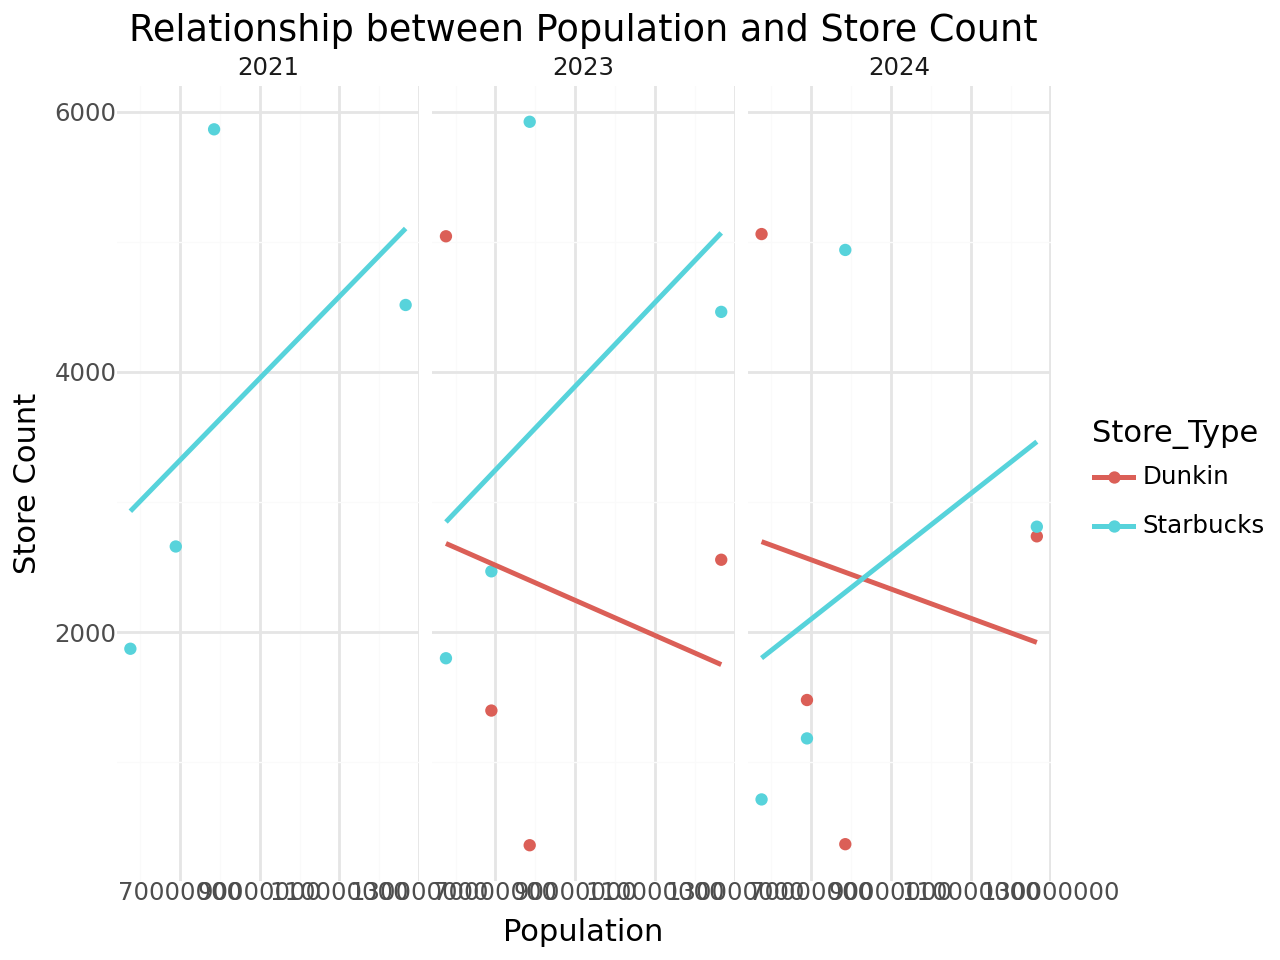

C:\Users\tcjen\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


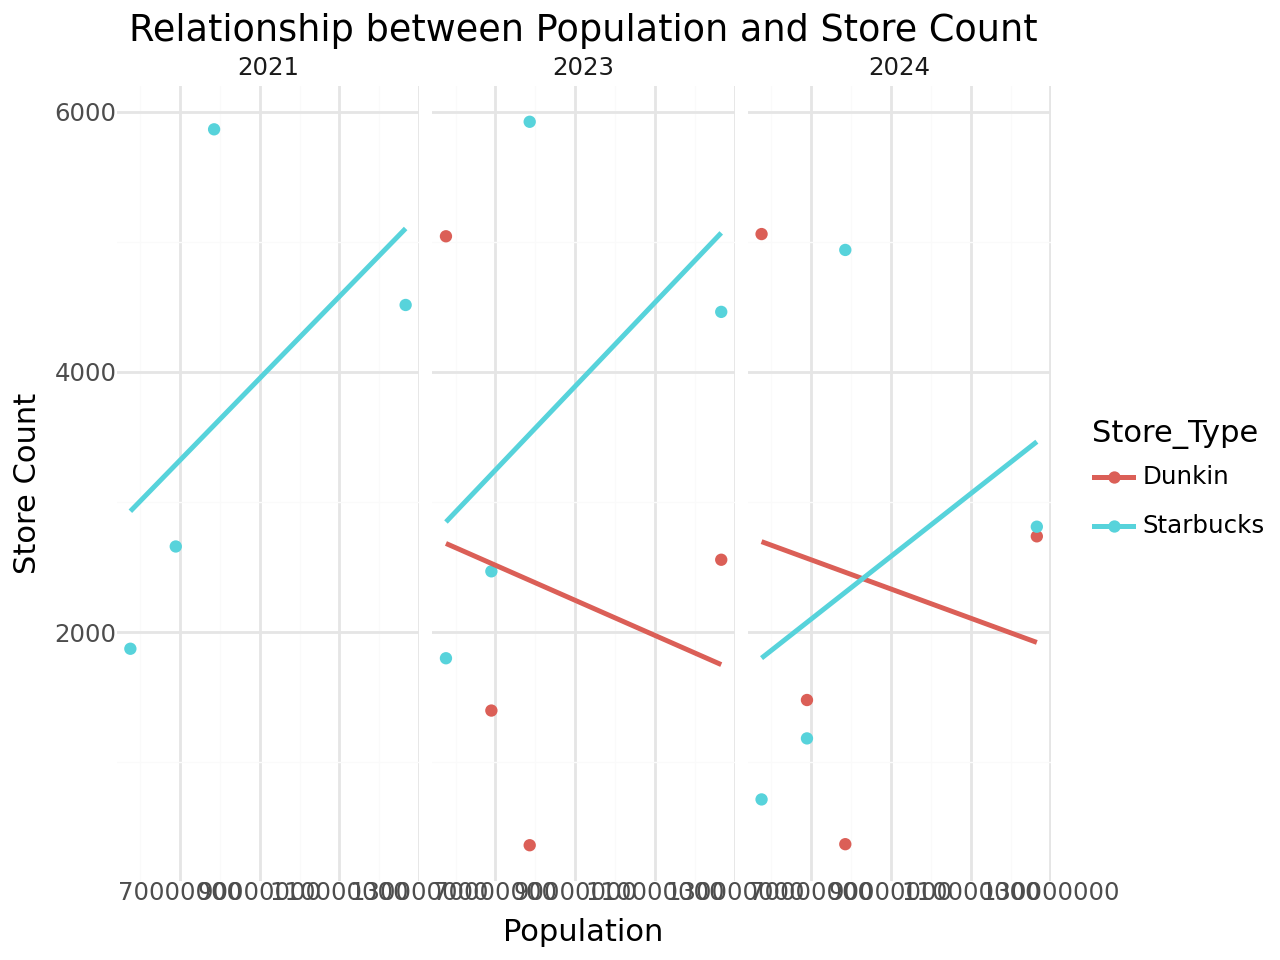

In [26]:
from plotnine import *

# Create the plot
plot = (
    ggplot(grouped_data, aes(x='Population', y='Count', color='Store_Type')) +
    geom_point() +
    geom_smooth(method='lm', se=False) +  # Add a trendline
    facet_wrap('~Year') +  # Create separate plots for each year
    labs(
        title='Relationship between Population and Store Count',
        x='Population',
        y='Store Count'
    ) +
    theme_minimal()
)

# Display the plot
print(plot)


#### we can see from the graph that the number of Starbucks store increase as the population increase, while the number of Dunkin stores decrease as the population increase

#### 2. Does the revenue for Starbucks matches the revenue for Dunkins based of the percentage of store count? 

In [20]:
print(merged_data.dtypes)

Year          object
State         object
Population     int32
Store_Type    object
Count          int32
Revenue        int64
Region        object
dtype: object
Year          object
State         object
Population     int32
Store_Type    object
Count          int32
Revenue        int64
Region        object
dtype: object


In [21]:
summary = merged_data.groupby(['Year', 'Store_Type', 'Revenue'], as_index = False).agg({'Count': 'sum'})
summary

,Year,Store_Type,Revenue,Count
0,2021,Starbucks,29061000000,14912
1,2023,Dunkin,11918000000,9361
2,2023,Starbucks,35976000000,14744
3,2024,Dunkin,11918000000,9666
4,2024,Starbucks,36476000000,9648


In 2023, Starbucks vs. Dunkin Store count percentage = 14744/9361 = 1.5750
and the revenue percentage was 35976000000/11918000000 = 3.0186
meaning that Starbucks earn more revenue than Dunkins for each store 

In 2024, Starbucks vs. Dunkin Store count percentage = 9648/9666 = 0.998
and the revenue percentage was 36476000000/11918000000 = 3.06, suggests the same as in 2023

#### Write function to take in URL argument and return the scraped data

In [22]:
def scrape_store_data(url):
    # Extract company name from the URL
    company_name = url.split('/')[-1].split('-')[0].capitalize()

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find("table")

    # Extract headers from <thead> (skip the first 'State' column header)
    headers = [th.get_text(strip=True) for th in table.find("thead").find_all("th")[1:]]

    rows = []
    # Iterate over all rows in the table body
    for row in table.find("tbody").find_all("tr"):
        state = row.find("th").get_text(strip=True)  # Extract state name
        cells = row.find_all("td")  # Extract store count data

        # Match each header with its corresponding cell value
        for i, cell in enumerate(cells):
            store_count = cell.get_text(strip=True)
            rows.append({
                "State": state,
                "Year": headers[i].split()[-1],  # Extract the year from the header
                "Brand": f"{company_name}",
                "Count": store_count
            })

    # Convert the data into a DataFrame
    df = pd.DataFrame(rows)
    return df

In [23]:
# Scrape Starbucks
scrape_store_data("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

,State,Year,Brand,Count
0,California,2023,Starbucks,"3,080"
1,California,2021,Starbucks,"2,959"
2,California,2024,Starbucks,"3,117"
3,Texas,2023,Starbucks,"1,346"
4,Texas,2021,Starbucks,"1,215"
...,...,...,...,...
148,North Dakota,2021,Starbucks,20
149,North Dakota,2024,Starbucks,
150,Vermont,2023,Starbucks,8
151,Vermont,2021,Starbucks,35


In [24]:
# Scrape Dunkin
scrape_store_data("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

,State,Year,Brand,Count
0,New York,2024,Dunkin,"1,431"
1,New York,2023,Dunkin,"1,414"
2,Massachusetts,2024,Dunkin,"1,042"
3,Massachusetts,2023,Dunkin,"1,068"
4,Florida,2024,Dunkin,909
...,...,...,...,...
97,Oregon,2023,Dunkin,0
98,South Dakota,2024,Dunkin,0
99,South Dakota,2023,Dunkin,0
100,Washington,2024,Dunkin,0
